# COGS 118B - Final Project

In [252]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import umap


In [253]:
data = pd.read_csv('CreditCard_dataset.csv')

#drop customer ID column
data.drop(columns=['CUST_ID'], inplace=True)

#replace null values with zeros
data['MINIMUM_PAYMENTS'].fillna(method='bfill', inplace=True)


/var/folders/z9/c66hmjx12w3g41xmv5xvlyqw0000gn/T/ipykernel_22338/3476995391.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['MINIMUM_PAYMENTS'].fillna(method='bfill', inplace=True)


In [254]:
null_count = data.isna().sum()

null_count

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [255]:
data.dropna(inplace=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,244.791237,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,82.418369,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [256]:
null_count = data.isna().sum()

null_count

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [257]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<Axes: >

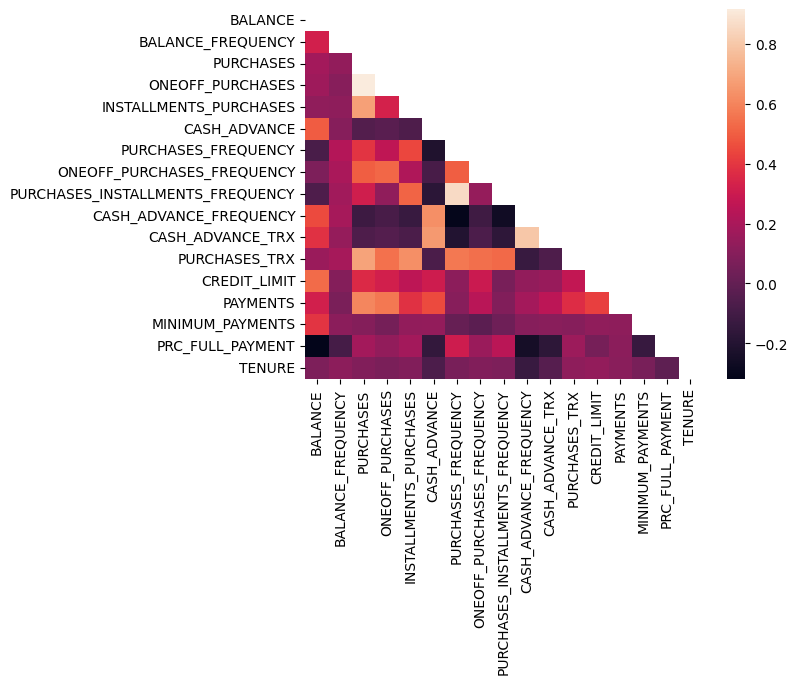

In [258]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask)

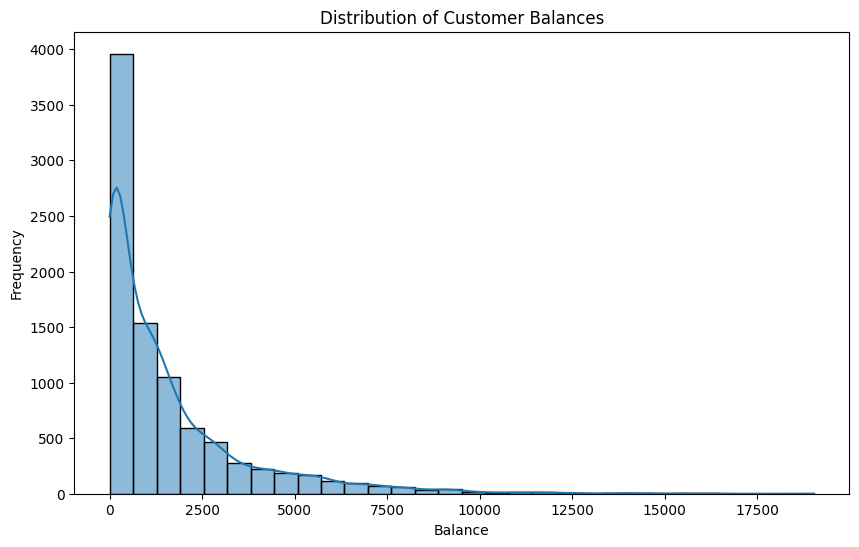

In [259]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a histogram for the 'BALANCE' column
sns.histplot(data['BALANCE'], bins=30, kde=True)

# Add a title and labels to the plot
plt.title('Distribution of Customer Balances')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# Display the plot
plt.show()

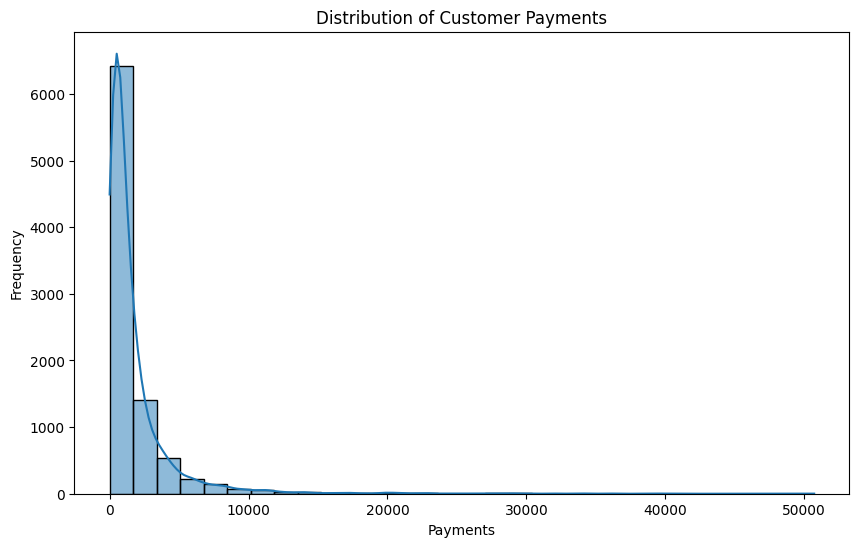

In [260]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a histogram for the 'PAYMENTS' column
sns.histplot(data['PAYMENTS'], bins=30, kde=True)

# Add a title and labels to the plot
plt.title('Distribution of Customer Payments')
plt.xlabel('Payments')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [261]:
scale_data = pd.DataFrame(StandardScaler().fit_transform(data))
scale_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.309046,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.088095,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.101381,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.264223,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.264223,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.347627,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.333352,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.333352,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.344703,0.329128,-4.126919


In [265]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pcas = pca.fit_transform(scale_data)

component_names = [f"PCA{i+1}" for i in range(pcas.shape[1])]

pcas = pd.DataFrame(pcas, columns=component_names)

pcas.describe()

pcas=pcas.iloc[:,:7]

pcas = pd.DataFrame(normalize(pcas), columns = component_names)
pcas

,PCA1,PCA2
0,-0.842332,-0.538959
1,-0.413753,0.910389
2,0.930118,-0.367260
3,-0.999999,-0.001150
4,-0.918540,-0.395328
...,...,...
8944,-0.175510,-0.984478
8945,-0.325936,-0.945392
8946,-0.455280,-0.890349
8947,-0.962569,-0.271039


<Axes: xlabel='PCA1', ylabel='PCA2'>

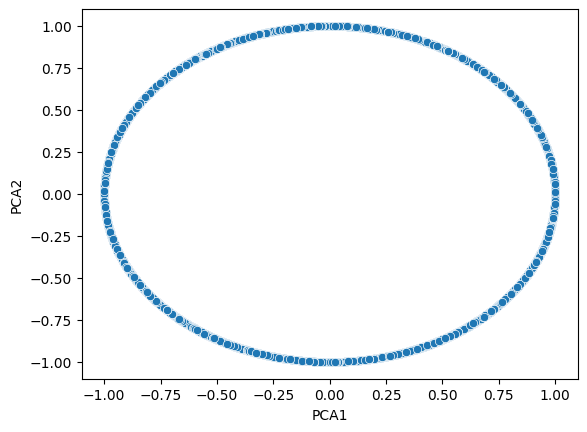

In [268]:
sns.scatterplot(pcas, x='PCA1', y='PCA2')

<Axes: xlabel='TSNE_Component_1', ylabel='TSNE_Component_2'>

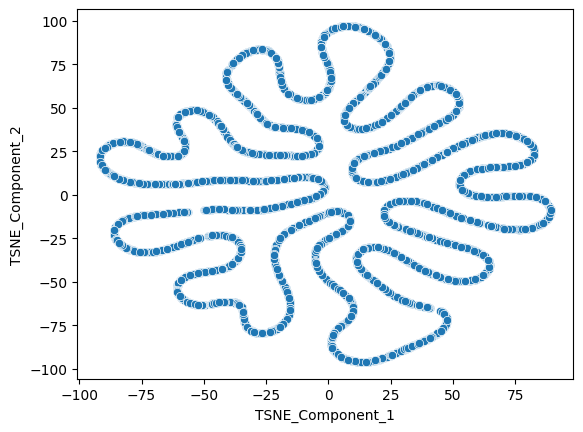

In [266]:
from sklearn.manifold import TSNE
import pandas as pd


X = pcas.values

tsne = TSNE(n_components=2, random_state=42)

# Apply T-SNE transformation to your data
X_tsne = tsne.fit_transform(X)

# Assuming X_tsne is a NumPy array with transformed data
# You can convert it to a DataFrame if needed
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE_Component_1', 'TSNE_Component_2'])

sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne)


/Users/vishalpatel/miniforge3/envs/COGS118B_WI24/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


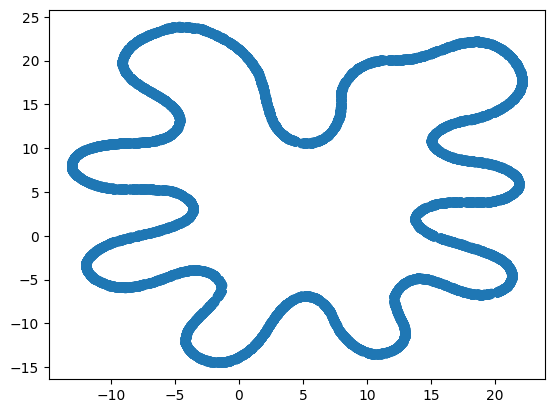

In [267]:
reducer = umap.UMAP(random_state=99, min_dist=0.1, n_neighbors=300)
embedding = reducer.fit_transform(pcas)
plt.scatter(embedding[:, 0], embedding[:, 1])

# PCA BEFORE KMEANS

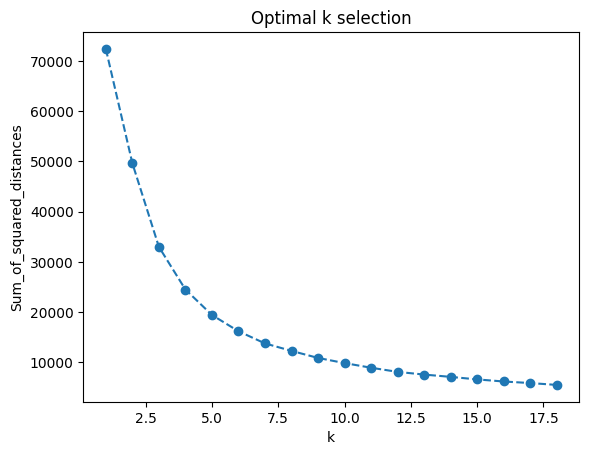

In [ ]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(pcas)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k selection')
plt.show()

<Axes: xlabel='PCA1', ylabel='PCA2'>

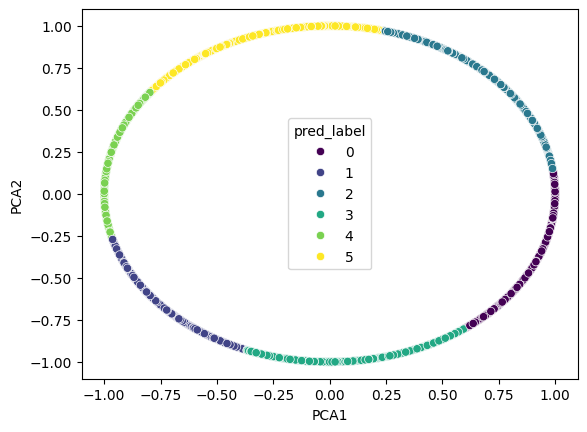

In [269]:
km_df = pcas.copy()

km = KMeans(n_clusters=6, n_init=10)
km = km.fit(km_df)
labels = km.labels_

km_df['pred_label'] = labels
sns.scatterplot(km_df, x='PCA1', y='PCA2', hue='pred_label', palette='viridis')

# PCA AFTER KMEANS

In [1]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(pcas)
labels = kmeans.labels_

pca = PCA(n_components=2)
pcs = pca.fit_transform(pcas)
pcs_df = pd.DataFrame(pcs)

pcs_df['pred_labels'] = labels

sns.scatterplot(pcs_df, x=0, y=1, hue='pred_labels')

NameError: name 'KMeans' is not defined

### KMEANS

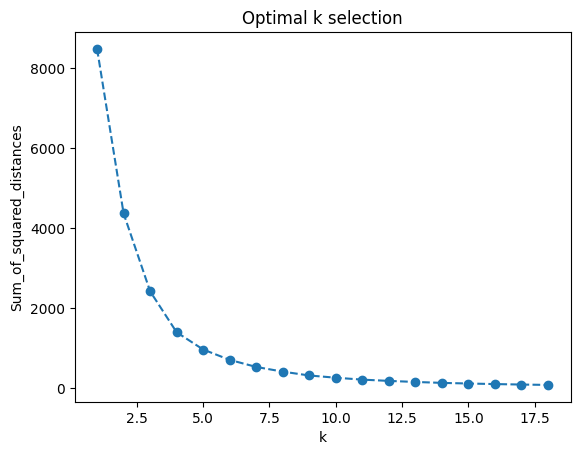

In [271]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(pcas)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k selection')
plt.show()

In [272]:
def distortion_measure(points: np.ndarray, centroids: np.ndarray) -> float:
    distortion = 0
    for pt in points.values:
        dists = []
        for c in centroids:
            dists.append(np.sum((pt - c) ** 2) ** 0.5)

        distortion += min(dists)
    return distortion

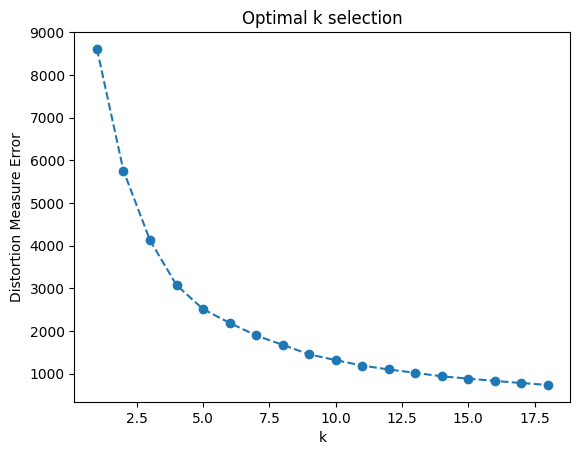

In [273]:
distortion_measure_error = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(pcas)
    score = distortion_measure(pcas, km.cluster_centers_)
    distortion_measure_error.append(score)

plt.plot(K, distortion_measure_error, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Distortion Measure Error')
plt.title('Optimal k selection')
plt.show()

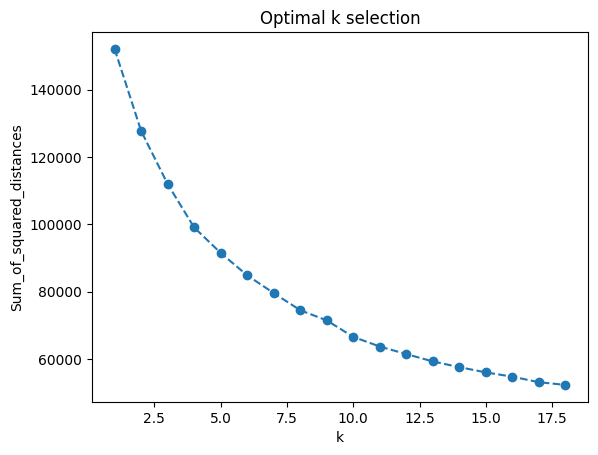

In [274]:
sum_of_squared_distances = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(scale_data)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k selection')
plt.show()

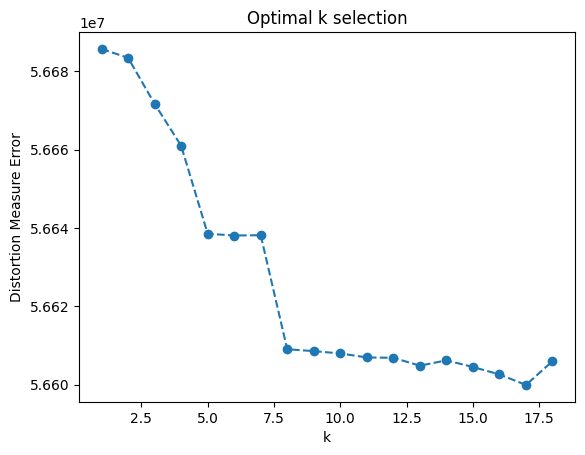

In [275]:
distortion_measure_error = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(scale_data)
    score = distortion_measure(data, km.cluster_centers_)
    distortion_measure_error.append(score)

plt.plot(K, distortion_measure_error, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Distortion Measure Error')
plt.title('Optimal k selection')
plt.show()

Based on the graphs we believe when `k` = 7 is the most optimal k selection

In [276]:
km = KMeans(n_clusters=7, n_init=10)
km = km.fit(pcas)
labels = km.labels_

data['pred_label'] = labels

### DBSCAN

<Axes: xlabel='PCA1', ylabel='PCA2'>

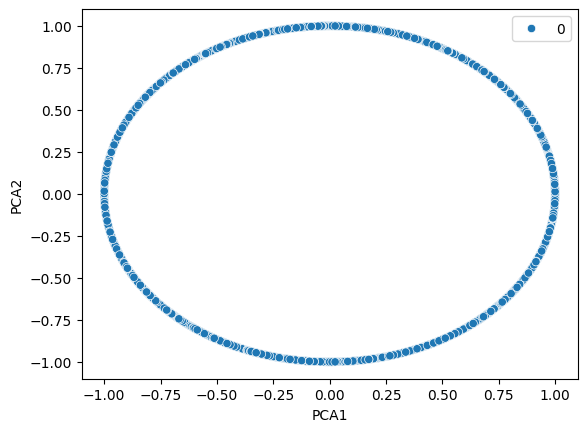

In [277]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.impute import KNNImputer

# --- Implementing DBSCAN ---
dbscan = DBSCAN(eps=2, min_samples=4)
y_dbscan = dbscan.fit_predict(pcas)

sns.scatterplot(pcas, x='PCA1' ,y='PCA2', hue=y_dbscan)


### Gaussian

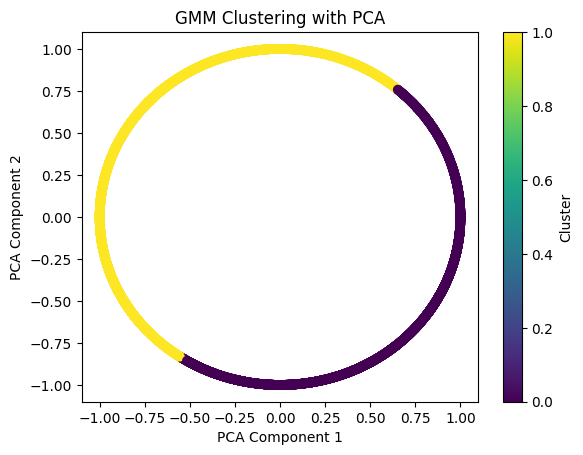

In [278]:
n_components = 2
gmm = GaussianMixture(n_components=n_components)
gmm.fit(pcas)

# 5. Visualize the results
plt.scatter(pcas['PCA1'], pcas['PCA2'], c=gmm.predict(pcas), cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()

### Heirarchical

In [279]:
normalize_df = normalize(pcas)

pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(normalize_df), columns=['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-0.334382,-0.707379
1,-0.848847,0.713753
2,0.990903,0.482025
3,-0.780279,-0.367860
4,-0.480923,-0.636928
...,...,...
8944,0.466735,-0.670633
8945,0.322438,-0.728373
8946,0.185651,-0.760762
8947,-0.590083,-0.562966


In [280]:
linkage_ward = linkage(pca_df, method ='ward')

Dendogram = dendrogram(linkage_ward) 


Error in callback <function _draw_all_if_interactive at 0x1620d0b80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
clust = fcluster(linkage_ward, criterion='distance', t=50) 
data['clust'] = clust

<Axes: >

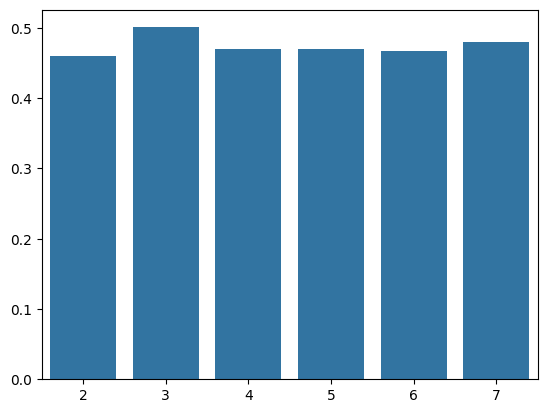

In [ ]:
silhouette_scores = []
cluster_range = range(2, 8)
for n in cluster_range:
    silhouette_scores.append( 
        silhouette_score(pca_df, AgglomerativeClustering(n_clusters = n).fit_predict(pca_df))) 

sns.barplot(x=cluster_range, y=silhouette_scores)